In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/SowmyaDevaraj/Documents/Text Representation/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["label", "message"]

In [4]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df['label_num']=df['label'].map({
    'ham':0,
    'spam':1
})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Text Preprocessing**

In [6]:
# import spacy

# nlp = spacy.load("en_core_web_sm") 

# def preprocess(text):
#     # remove stop words and lemmatize the text
#     doc = nlp(text)
#     filtered_tokens = []
#     for token in doc:
#         if token.is_stop or token.is_punct:
#             continue
#         filtered_tokens.append(token.lemma_)
    
#     return " ".join(filtered_tokens) 
# df['preprocessed_txt'] = df['message'].apply(preprocess) 
# df.head()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.message, 
    df.label_num, 
    test_size=0.2, 
    random_state=42
)

In [8]:
print(y_train.value_counts())

label_num
0    3860
1     597
Name: count, dtype: int64


In [9]:
print(y_test.value_counts())

label_num
0    965
1    150
Name: count, dtype: int64


TFIDF for first 5 records

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
samp=df[:5]
samp

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
v=TfidfVectorizer()
transform_output=v.fit_transform(samp.message)
print(v.vocabulary_)

{'go': 22, 'until': 55, 'jurong': 31, 'point': 40, 'crazy': 13, 'available': 8, 'only': 39, 'in': 29, 'bugis': 10, 'great': 25, 'world': 61, 'la': 32, 'buffet': 9, 'cine': 11, 'there': 49, 'got': 24, 'amore': 5, 'wat': 57, 'ok': 37, 'lar': 33, 'joking': 30, 'wif': 58, 'oni': 38, 'free': 21, 'entry': 18, 'wkly': 60, 'comp': 12, 'to': 53, 'win': 59, 'fa': 19, 'cup': 14, 'final': 20, 'tkts': 52, '21st': 2, 'may': 35, '2005': 1, 'text': 47, '87121': 3, 'receive': 43, 'question': 41, 'std': 46, 'txt': 54, 'rate': 42, 'apply': 6, '08452810075over18': 0, 'dun': 16, 'say': 44, 'so': 45, 'early': 17, 'hor': 28, 'already': 4, 'then': 48, 'nah': 36, 'don': 15, 'think': 50, 'he': 26, 'goes': 23, 'usf': 56, 'lives': 34, 'around': 7, 'here': 27, 'though': 51}


In [12]:
#idf
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

08452810075over18 : 2.09861228866811
2005 : 2.09861228866811
21st : 2.09861228866811
87121 : 2.09861228866811
already : 2.09861228866811
amore : 2.09861228866811
apply : 2.09861228866811
around : 2.09861228866811
available : 2.09861228866811
buffet : 2.09861228866811
bugis : 2.09861228866811
cine : 2.09861228866811
comp : 2.09861228866811
crazy : 2.09861228866811
cup : 2.09861228866811
don : 2.09861228866811
dun : 2.09861228866811
early : 2.09861228866811
entry : 2.09861228866811
fa : 2.09861228866811
final : 2.09861228866811
free : 2.09861228866811
go : 2.09861228866811
goes : 2.09861228866811
got : 2.09861228866811
great : 2.09861228866811
he : 2.09861228866811
here : 2.09861228866811
hor : 2.09861228866811
in : 1.6931471805599454
joking : 2.09861228866811
jurong : 2.09861228866811
la : 2.09861228866811
lar : 2.09861228866811
lives : 2.09861228866811
may : 2.09861228866811
nah : 2.09861228866811
ok : 2.09861228866811
oni : 2.09861228866811
only : 2.09861228866811
point : 2.0986122886

In [13]:
#tfidf
print(transform_output.toarray())

[[0.         0.         0.         0.         0.         0.2380216
  0.         0.         0.2380216  0.2380216  0.2380216  0.2380216
  0.         0.2380216  0.         0.         0.         0.
  0.         0.         0.         0.         0.2380216  0.
  0.2380216  0.2380216  0.         0.         0.         0.19203433
  0.         0.2380216  0.2380216  0.         0.         0.
  0.         0.         0.         0.2380216  0.2380216  0.
  0.         0.         0.         0.         0.         0.
  0.         0.2380216  0.         0.         0.         0.
  0.         0.2380216  0.         0.2380216  0.         0.
  0.         0.2380216 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.4472136  0.         0.         0.4472136  0.     

**TFIDF and LR**

In [14]:
tf_idf=TfidfVectorizer(stop_words='english')
train_tf=tf_idf.fit_transform(X_train)
test_tf=tf_idf.transform(X_test)


In [19]:
from sklearn.decomposition import PCA

In [20]:
n_components = 5  
pca = PCA(n_components=n_components, random_state=42)

X_train_pca = pca.fit_transform(train_tf.toarray())
X_test_pca = pca.transform(test_tf.toarray())


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train)

pred=lr.predict(X_test_pca)

accuracy=accuracy_score(y_test,pred)
report=classification_report(y_test,pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, pred)

print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8224215246636771
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       965
           1       0.42      0.87      0.57       150

    accuracy                           0.82      1115
   macro avg       0.70      0.84      0.73      1115
weighted avg       0.90      0.82      0.85      1115

Confusion Matrix:
[[787 178]
 [ 20 130]]


c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt

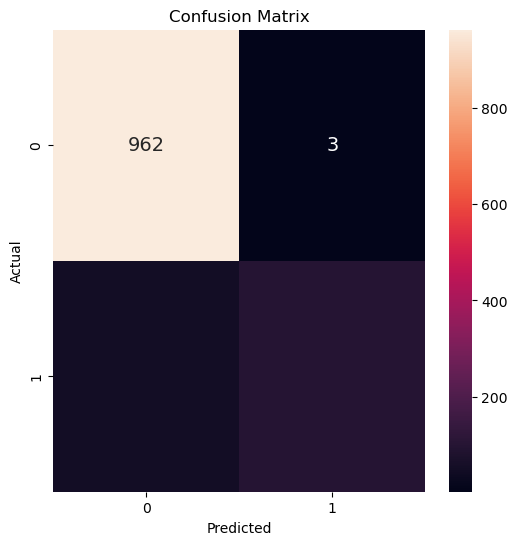

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=True, annot_kws={"size": 14})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
y_test[5:10]

2973    0
2991    0
2942    0
230     0
1181    0
Name: label_num, dtype: int64

In [18]:
y_pred[5:10]

NameError: name 'y_pred' is not defined